In [59]:
import numpy as np

mean_1 = np.array([2,3])
mean_2 = np.array([-2,2])
mean_3 = np.array([3,-1])

cov_1 = np.array([[1, 0.8], [0.8, 1]])
cov_2 = np.array([[0.5, -0.3], [-0.3, 0.5]])
cov_3 = np.array([[1, -0.1], [-0.1, 1]])

print(mean_1)
print(mean_2)
print(mean_3)
print(cov_1)
print(cov_2)
print(cov_3)

[2 3]
[-2  2]
[ 3 -1]
[[1.  0.8]
 [0.8 1. ]]
[[ 0.5 -0.3]
 [-0.3  0.5]]
[[ 1.  -0.1]
 [-0.1  1. ]]


In [2]:
data_1 = np.random.multivariate_normal(mean_1, cov_1, 100)
data_2 = np.random.multivariate_normal(mean_2, cov_2, 100)
data_3 = np.random.multivariate_normal(mean_3, cov_3, 100)


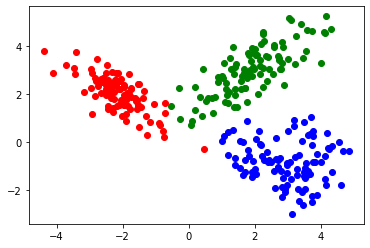

In [58]:
import matplotlib.pyplot as plt

plt.plot(data_1[:,0],data_1[:,1], 'o', color='green')
plt.plot(data_2[:,0],data_2[:,1], 'o', color='red')
plt.plot(data_3[:,0],data_3[:,1], 'o', color='blue')

plt.savefig('data.pdf')

In [8]:
data = np.vstack((np.vstack((data_1,data_2)),data_3))

In [21]:
def gauss(x, mü, cov):
    return (1/(2*(np.pi**(2/2))*np.linalg.det(cov)**(1/2)))*np.exp(-(1/2)*(np.transpose(x-mü)@np.linalg.inv(cov))@(x-mü))

In [35]:
max_iter = 30
phi = np.array([0.3333,0.3333,1-0.6666])
W = np.zeros((300,3))
mü = np.zeros((3,2))
mü[0,1] = 1
mü[1,0] = 2
mü[2,1] = 2
cov = [np.array([[1, 0], [0, 1]]), np.array([[0.5, 0.2], [0.2, 0.5]]), np.array([[1, -0.3], [-0.3, 1]])]

for k in range(0, max_iter):
    for i in range(0,W.shape[0]):
        for j in range(0,3):
            tmp = 0
            for l in range(0,3):
                tmp += phi[l]*gauss(data[i], mü[l], cov[l])
            W[i,j] = gauss(data[i], mü[j], cov[j])*phi[j]/tmp
    for j in range(0,3):
        tmp_phi = 0
        mü_tmp = np.zeros((2,))
        cov_tmp = np.zeros((2,2))
        for i in range(0,300):
            tmp_phi += (1/300)*W[i,j]
            mü_tmp += W[i,j]*data[i]
        phi[j] = tmp_phi
        mü[j] = mü_tmp/(tmp_phi*300)
        for i in range(0,300):
            cov_tmp += W[i,j]*np.reshape(data[i]-mü[j], (2,1))@np.reshape(data[i]-mü[j], (2,1)).T
        cov[j] = cov_tmp/(tmp_phi*300)

In [62]:

print(np.round(mü[0],1))
print(np.round(mü[1],1))
print(np.round(mü[2],1))

print(np.round(cov[0],1))
print(np.round(cov[1],1))
print(np.round(cov[2],1))


[1.9 3. ]
[ 2.9 -0.8]
[-2.1  2. ]
[[1.2 0.9]
 [0.9 1.1]]
[[ 0.9 -0.1]
 [-0.1  0.8]]
[[ 0.5 -0.3]
 [-0.3  0.5]]


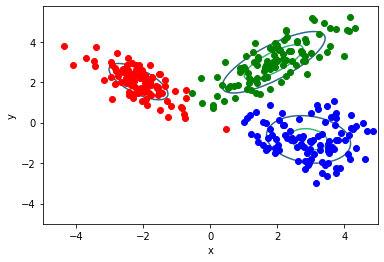

In [57]:
xlist = np.linspace(-5.0, 5.0, 100)
ylist = np.linspace(-5.0, 5.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z_1 = np.zeros((X.shape[0],X.shape[0]))
for i in range(0, X.shape[0]):
    for j in range(0, X.shape[0]):
        Z_1[i,j] = gauss(np.array([X[i,j],Y[i,j]]), mü[0], cov[0])
Z_2 = np.zeros((X.shape[0],X.shape[0]))
for i in range(0, X.shape[0]):
    for j in range(0, X.shape[0]):
        Z_2[i,j] = gauss(np.array([X[i,j],Y[i,j]]), mü[1], cov[1])
Z_3 = np.zeros((X.shape[0],X.shape[0]))
for i in range(0, X.shape[0]):
    for j in range(0, X.shape[0]):
        Z_3[i,j] = gauss(np.array([X[i,j],Y[i,j]]), mü[2], cov[2])
plt.figure()
plt.plot(data_1[:,0],data_1[:,1], 'o', color='green')
plt.plot(data_2[:,0],data_2[:,1], 'o', color='red')
plt.plot(data_3[:,0],data_3[:,1], 'o', color='blue')
cp = plt.contour(X, Y, Z_1, 2)
cp = plt.contour(X, Y, Z_2, 2)
cp = plt.contour(X, Y, Z_3, 2)
#plt.clabel(cp, inline=True, fontsize=10)

plt.xlabel('x')
plt.ylabel('y')
plt.savefig('gauss.pdf')